<a href="https://colab.research.google.com/github/alecav98/quick-NLP/blob/main/NLP_moviesDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP for Sentiment Analysis

In this colab we'll use the Large Movie Review Dataset to perform sentiment analysis using various models and compare the results. First, we'll import the necessary tools.

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

Now, we load the dataset from TensorFlow Datasets. The dataset can also be downloaded [here](http://ai.stanford.edu/~amaas/data/sentiment/).

In [ ]:
# Get the training dataset
train_ds, info = tfds.load('imdb_reviews', split='train', with_info=True)

print(info.features)
print(info.features["label"].num_classes)
print(info.features["label"].names)

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(), dtype=tf.string),
})
2
['neg', 'pos']


In [ ]:
# Print some of the entries
for example in train_ds.take(5):  
  review, label = example["text"], example["label"]
  print("Review:", review.numpy().decode('utf-8'))
  print("Label: %d \n" % label.numpy())

Review: This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
Label: 0 

Review: I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. Th

We assume the training and test sets are already shuffled, so we will go ahead and get the text and labels for both the training and test sets.

In [ ]:
train_texts = []
train_labels = []

# Train dataset has 25,000 samples so we are taking all of them
for item in train_ds.take(-1):
  review, label = item["text"], item["label"]
  train_texts.append(review.numpy().decode('utf-8')) # need .decode() bc tensorflow stores it as byte object
  train_labels.append(label.numpy())

# Print some training reviews and labels to make sure everything worked
for i in range(2):
  print("Review: ", train_texts[i])
  print("Label: ", train_labels[i])
  print('\n')

Review:  This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
Label:  0


Review:  I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish.

In [ ]:
# Print length of training set to make sure, it should be 25,000
print("Length of training ds: ", len(train_texts))

Length of training ds:  25000


In [ ]:
# Get test dataset
test_ds = tfds.load('imdb_reviews', split='test')

test_texts = []
test_labels = []

# Test dataset has 25,000 samples so we'll take all of them
for item in test_ds.take(-1):
  review, label = item["text"], item["label"]
  test_texts.append(review.numpy().decode('utf-8'))
  test_labels.append(label.numpy())

# Print some test reviews and labels to make sure everything worked
for i in range(2):
  print("Review: ", test_texts[i])
  print("Label: ", test_labels[i])
  print('\n')

Review:  There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come.
Label:  1


Review:  A blackly comic tale of a down

In [ ]:
# Again, make sure its 25,000
print("Length of test ds: ", len(test_texts))

Length of test ds:  25000


# Create subwords
Now that we have our training and test data in an easily digestible format, we'll create subwords out of the training reviews.

In [ ]:
# CAN TUNE THESE LATER IF NECESSARY
vocab_size = 4000
subword_length = 5

# Build subwords from our training reviews
tokenizer = tfds.features.text.SubwordTextEncoder.build_from_corpus(train_texts, vocab_size,
                                                                    max_subword_length=subword_length)

# We can look at the word index if we want
##word_index = tokenizer.word_index

In [ ]:
# Check that the tokenizer works appropriately
num = 1
print(train_texts[num])
encoded = tokenizer.encode(train_texts[num])
print(encoded)

I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of what was causing them or why. I admit, I may have missed part of the film, but i watched the majority of it and everything just seemed to happen of its own accord without any real concern for anything else. I cant recommend this film at all.
[12, 40, 116, 1103, 3772, 8, 2318, 385, 231, 782, 3772, 750, 35, 153, 2, 31, 18, 9, 637, 44, 2009, 8, 4, 2981, 813, 38, 7, 103, 5, 684, 1560, 3843, 2, 90, 16, 3286, 3840, 2, 166, 3772, 3345, 3772, 6, 824, 1312, 209, 26, 1, 1691, 251, 6, 630, 35, 66, 1821, 145, 4, 494, 3856, 3, 732, 55, 26, 18, 2996, 418, 12, 2119, 3772, 385, 231, 782, 3772, 121, 75, 1, 41, 23, 3643, 580, 490, 3, 

In [ ]:
# Separately print out each subword, decoded
for i in encoded:
  print(tokenizer.decode([i]))

I 
have 
been 
known
 
to 
fall 
as
le
ep
 
durin
g 
films
, 
but 
this 
is 
usual
ly 
due 
to 
a 
combi
natio
n 
of 
thing
s 
inclu
din
g
, 
reall
y 
tire
d
, 
being
 
warm
 
and 
com
fort
able 
on 
the 
set
te 
and 
havin
g 
just 
eat
en 
a 
lo
t
. 
Howev
er 
on 
this 
occas
ion 
I 
fell
 
as
le
ep
 
becau
se 
the 
film 
was 
rub
bi
sh
. 
The 
plot 
devel
opmen
t 
was 
const
ant
. 
Con
stan
tly 
slow 
and 
borin
g
. 
Thin
gs 
seeme
d 
to 
happe
n
, 
but 
with 
no 
expla
natio
n 
of 
what 
was 
ca
using
 
them 
or 
wh
y
. 
I 
admit
, 
I 
may 
have 
misse
d 
part 
of 
the 
film
, 
but 
i 
watch
ed 
the 
major
ity 
of 
it 
and 
every
thing
 
just 
seeme
d 
to 
happe
n 
of 
its 
own 
acco
rd 
witho
ut 
any 
real 
conce
rn 
for 
anyth
ing 
else
. 
I 
can
t 
recom
mend 
this 
film 
at 
all
.


Now since we have our subword tokenizer now, we need to change all the words in our training and test reviews to subwords. That is, we need to encode the reviews using subwords.

In [ ]:
# Create new arrays to hold encoded train and test reviews
train_sequences = []
test_sequences = []

# Since we know train and test sets both have same # of reviews
for i in range(len(train_texts)):
  train_sequences.append(tokenizer.encode(train_texts[i]))
  test_sequences.append(tokenizer.encode(test_texts[i]))

# Check the reviews are appropriately replaced
print("Example train sequence: ", train_sequences[0])
print("Example test sequence: ", test_sequences[0])

Example train sequence:  [69, 23, 46, 857, 1035, 3772, 507, 201, 21, 3, 730, 3779, 13, 43, 646, 269, 11, 52, 520, 1163, 61, 1416, 2498, 54, 1137, 522, 1607, 1364, 1186, 3, 3595, 80, 37, 112, 3772, 157, 3855, 2, 31, 18, 453, 408, 16, 43, 96, 3772, 530, 3772, 664, 11, 766, 296, 3, 945, 96, 3772, 112, 3772, 170, 35, 114, 3772, 42, 2910, 1098, 18, 21, 3779, 5, 1442, 1330, 3772, 81, 978, 3, 69, 21, 3772, 9, 46, 972, 3772, 347, 1538, 551, 1494, 3772, 2531, 1074, 228, 4, 728, 3, 24, 131, 3483, 422, 98, 5, 106, 262, 3772, 88, 1, 1192, 626, 3185, 38, 158, 1880, 5, 106, 447, 35, 96, 3772, 2199, 5, 29, 3058, 2807, 3855, 3, 1750, 4, 1045, 707, 2003, 677, 1364, 178, 377, 269, 3162, 3861, 2, 6, 61, 3348, 1380, 3851, 3785, 227, 1361, 2554, 27, 1416, 2498, 23, 311, 34, 31, 4, 3483, 422, 859, 1484, 2572, 35, 11, 4, 21, 3772, 15, 23, 3670, 3474, 3772, 7, 147, 301, 2290, 137, 3, 12, 287, 608, 155, 33, 15, 79, 3772, 37, 21, 5, 57, 326, 2, 3243, 28, 157, 3779, 5, 57, 520, 1163, 61, 1416, 353, 3850, 3779, 5

Neural networks require a fixed input size, therefore we need to truncate and/or pad our sequences so they all are the same length.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# First we will set the initial value for some hyperparameters
# You can play around these values to look for optimization
max_length = 50
trunc_type='post'
pad_type='post'

# Pad/Truncate sequences from the training data
padded_train = pad_sequences(train_sequences, maxlen=max_length, 
                                truncating=trunc_type, padding=pad_type)

# Do the same with the test data
padded_test = pad_sequences(test_sequences, maxlen=max_length, 
                                truncating=trunc_type, padding=pad_type)

# Right now our labels for both train and test data are arrays of tensors, 
# let's make them be numpy arrays for use in the model
final_train_labels = np.array(train_labels)
final_test_labels = np.array(test_labels)

# Build Models

Now that we have our data tokenized and preprocessed in a format that is ready for the model, we will create two different models and compare their performance. First, we will build a function that is able to fit and display the results of the different models.

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:
def fit_model_and_show_results (model, learning_rate):
  lr = learning_rate
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  optimizer=tf.keras.optimizers.Adam(lr), 
                  metrics=['accuracy'])
  
  model.summary()
  history = model.fit(padded_train, final_train_labels, epochs=num_epochs, 
                      validation_data=(padded_test, final_test_labels))
  
  # Plot the results of accuracy and loss
  plot_graphs(history, "accuracy")
  plot_graphs(history, "loss")

The first model we'll try has a CNN layer followed by a couple dense layers.

In [ ]:
num_epochs = 20 # INSTEAD OF 30
embedding_dim = 16

cnn_model = tf.keras.Sequential([
            tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
            tf.keras.layers.Conv1D(128, 5, activation='relu'),
            tf.keras.layers.GlobalAveragePooling1D(),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            64000     
_________________________________________________________________
conv1d (Conv1D)              (None, 46, 128)           10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 82,689
Trainable params: 82,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
782/782 [==============================] - 5s 6ms/step - loss: 0.7015 - accuracy: 0.5000 - val_loss: 0.6900

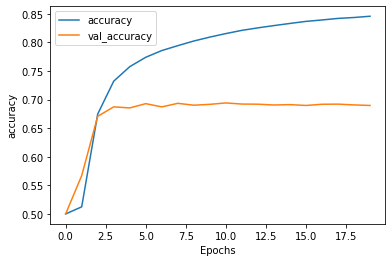

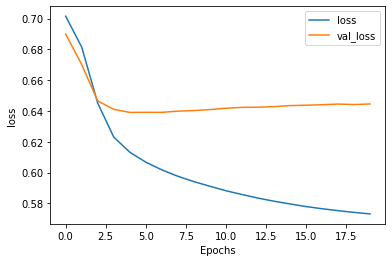

In [ ]:
# Default learning rate for the Adam optimizer is 0.001
# We'll slow down the learning rate by 10.
learning_rate = 0.0001
fit_model_and_show_results(cnn_model, learning_rate)

Because these reviews are rather long, next we will build a model that uses LSTM layers instead of conv layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 16)            64000     
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 32)            4224      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 76,673
Trainable params: 76,673
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
782/782 [==============================] - 16s 21ms/step - loss: 0.6779 - accuracy: 0.5664 - val_loss: 0.

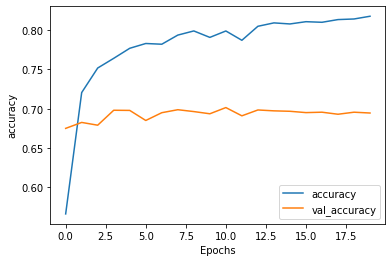

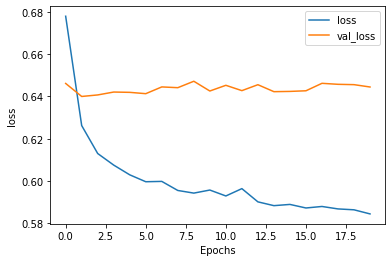

In [ ]:
# Build new network utilizing two LSTM layers
rnn_model = tf.keras.Sequential([
            tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, 
                                                       return_sequences=True)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
])

# Again, let's slow down the learning rate by 10.
fit_model_and_show_results(rnn_model, 0.0003)

In [ ]:
# WE COULD OPTIMIZE THE LEARNING RATE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Default learning rate for the Adam optimizer is 0.001
# Let's slow down the learning rate by 10.
## learning_rate = 0.0001
## model_cnn.compile(loss='binary_crossentropy',
##                   optimizer=tf.keras.optimizers.Adam(learning_rate), 
##                   metrics=['accuracy'])

## fit_model_and_show_results(cnn_model)

# Evaluate using our own data

Now that we have seen the accuracy and loss graphs for both models, let's take some random movie reviews from [rotten tomatoes](https://www.rottentomatoes.com/browse/in-theaters/) and see how well our models classsify them.

In [ ]:
random_reviews = ["Here's one of the loveliest adventures of the year, a movie about a stubborn, indomitable character who robs people because that's what he knows best.",
                "A flabby hunk of meat that the director, Matt Eskandari, hasn't bothered to season.",
                "A seamlessly crafted thriller with exemplary performances all round.",
                "It was a waste of my time, I honestly wish I had never gone to watch this movie.",
                "The Man from Nowhere supplies more than enough drama and bloody-good action to make for a compelling film but what really drives it home is its riveting direction. The film is able to display the emotional, vivacious and authentic storytelling that is a clear developing sign of Korean cinema. 4/5",
                "What you will be getting when you walk into an inevitably overstuffed movie theater is something singular that reflects our age in a way that none of the MCU films that preceded it have-indeed, very few Hollywood spectacles ever have.",
                "I loved this movie",
                "that was the worst movie I've ever seen",
                "too much violence even for a Bond film",
                "a captivating recounting of a cherished myth"

]

We will create a function to predict sentiment in order to save some time.

In [ ]:
def pred_reviews(model, new_reviews, maxlen=max_length, show_padded_sequence=True):
  # Create an array to hold the encoded sequences
  sequences = []

  # Convert the new reviews to sequences
  for i in range(len(new_reviews)):
    sequences.append(tokenizer.encode(new_reviews[i]))

  trunc_type='post'
  pad_type='post'

  # Add padding/truncate all the new sequences
  sequences_padded = pad_sequences(sequences, maxlen=max_length, 
                                truncating=trunc_type, padding=pad_type)             

  predictions = model.predict(sequences_padded)

  # The closer the class is to 1, the more positive the review is
  for x in range(len(new_reviews)):
    
    # We can see the padded sequence if desired
    # Print the sequence
    if (show_padded_sequence):
      print(sequences_padded[x])
    # Print the review as text
    print(new_reviews[x])
    # Print its predicted class
    print("Prediction: ", predictions[x])
    print("\n")

Now let's see how our models do with our new random reviews.

In [ ]:
# First the CNN model
print("Reviews and Predictions from CNN Model")
print("\n")
pred_reviews(cnn_model, random_reviews, maxlen=max_length, show_padded_sequence=False)

Here's one of the loveliest adventures of the year, a movie about a stubborn, indomitable character who robs people because that's what he knows best.
Prediction:  [9.594547e-05]


A flabby hunk of meat that the director, Matt Eskandari, hasn't bothered to season.
Prediction:  [1.4126512e-08]


A seamlessly crafted thriller with exemplary performances all round.
Prediction:  [0.00112438]


It was a waste of my time, I honestly wish I had never gone to watch this movie.
Prediction:  [4.854391e-11]


The Man from Nowhere supplies more than enough drama and bloody-good action to make for a compelling film but what really drives it home is its riveting direction. The film is able to display the emotional, vivacious and authentic storytelling that is a clear developing sign of Korean cinema. 4/5
Prediction:  [0.999979]


What you will be getting when you walk into an inevitably overstuffed movie theater is something singular that reflects our age in a way that none of the MCU films that pre

In [ ]:
# Now the LSTM model
print("Reviews and Predictions from LSTM Model")
print("\n")
pred_reviews(rnn_model, random_reviews, maxlen=max_length, show_padded_sequence=False)

Here's one of the loveliest adventures of the year, a movie about a stubborn, indomitable character who robs people because that's what he knows best.
Prediction:  [3.0805226e-05]


A flabby hunk of meat that the director, Matt Eskandari, hasn't bothered to season.
Prediction:  [0.00014628]


A seamlessly crafted thriller with exemplary performances all round.
Prediction:  [0.27244836]


It was a waste of my time, I honestly wish I had never gone to watch this movie.
Prediction:  [9.189518e-06]


The Man from Nowhere supplies more than enough drama and bloody-good action to make for a compelling film but what really drives it home is its riveting direction. The film is able to display the emotional, vivacious and authentic storytelling that is a clear developing sign of Korean cinema. 4/5
Prediction:  [0.9999902]


What you will be getting when you walk into an inevitably overstuffed movie theater is something singular that reflects our age in a way that none of the MCU films that prec